<a href="https://colab.research.google.com/github/disakuz/A-B-testing/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D1%82%D0%B0%D1%84%D1%80%D0%B5%D0%B9%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
reester = pd.read_csv("/content/drive/MyDrive/A B testing/new_dataframe.csv")
reester.head()

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


In [ ]:
reester['user_id'].mean()

549874.8022068966

In [ ]:
reester = reester.dropna()
reester.head(30)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low
6,6,416988,0,iOS,comfort,no surge,1,1,0,0,0,1,7.535725,24,high
7,7,682337,2,Android,comfort,no surge,1,1,1,1,0,1,9.055344,21,low
9,9,662775,17,Android,comfort,surge,1,1,1,1,0,1,4.828326,36,low
10,10,464055,20,iOS,comfort,surge,1,1,1,1,0,0,3.647097,25,high
11,11,370093,12,Android,economy,no surge,1,1,1,1,0,0,4.273224,27,low


In [ ]:
reester.shape

(91431, 15)

In [ ]:
reester_order = reester[['user_id','order_made']].groupby('order_made').count()
reester_order.median()

user_id    45715.5
dtype: float64

### Здесь начинается онализ основновных показателей статистики метрик

In [ ]:
reester_distance = reester[['user_id','distance']].groupby('user_id')
reester_distance.head()

,user_id,distance
0,867689,7.982135
1,752172,2.908468
2,486559,7.224614
3,304024,1.874349
4,139420,10.704778
...,...,...
101495,288445,1.725907
101496,627754,6.206134
101497,784442,6.624225
101498,232993,8.825188


In [ ]:
reester['distance'].mean() # mean distance

5.371151996435624

In [ ]:
reester['distance'].median() # median distance

4.279564564612159

In [ ]:
np.percentile(reester['distance'],95) # 95 precenile distance

13.694289876456235

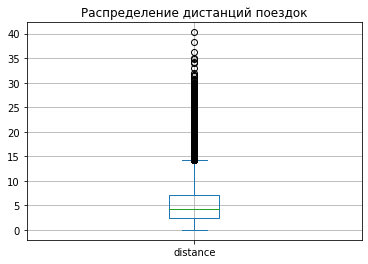

In [ ]:
reester['distance'].plot(kind='box',
                   title='Распределение дистанций поездок', grid=True)

Баг с кнопками заказа

In [ ]:
reester_canceled = reester[reester['user_cancelled']==1]
reester_canceled.head()

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
22,22,667749,5,Android,business,no surge,1,1,1,0,1,1,5.612632,23,low
27,27,654038,18,Android,economy,no surge,1,1,1,0,1,0,7.470499,21,high
48,48,732720,14,Android,economy,no surge,1,1,1,0,1,0,6.110571,19,low
57,57,376141,9,Android,economy,surge,1,1,1,0,1,1,2.640953,32,low
79,79,317225,5,Android,comfort,surge,1,1,1,0,1,1,5.642499,24,high


In [ ]:
reester_order_made = reester[reester['order_made'] == 1]
reester_order_made.head()

In [ ]:
reester_order_made_rfm = reester_order_made[['user_id','rfm']].groupby('rfm').count()
rfm_proc = (reester_order_made_rfm['user_id']/ reester_order_made_rfm['user_id'].sum()) * 100
reester_order_made_rfm['%'] = rfm_proc
reester_order_made_rfm.head()

In [ ]:
reester_cancelled_order = reester_order_made[['user_id', 'user_cancelled']].groupby('user_cancelled').count()
cancel_proc = (reester_cancelled_order['user_id']/ reester_cancelled_order['user_id'].sum()) * 100
reester_cancelled_order['%'] = cancel_proc
reester_cancelled_order.head()

In [ ]:
reester_hour = reester[['Unnamed: 0','hour']].groupby('hour').count()
reester_hour_1 = reester_hour.plot()

In [ ]:
reester_age = reester['age'].mean()
reester_age

In [ ]:
reester_time = reester[['hour','user_id']].groupby('hour').count()
reester_time_proc = (reester_time['user_id']/ reester_time['user_id'].sum()) * 100
reester_time['%'] = reester_time_proc
reester_time.head(23)

In [ ]:
reester_time.plot()

In [ ]:
reester_os = reester[['user_id', 'os']].groupby('os').count()
reester_os

In [ ]:
reester_open = reester[['user_id', 'order_made']].groupby('order_made').count()
reester_open

Средний возраст клиента 26 лет

In [ ]:
reester_cancelled = reester[['user_id'], ['user_cancelled' == 0]].groupby('user_cancelled').count()

reester_cancelled.head()

11.1% заказов отмененны. В чем причина такого большого процента

In [ ]:
reester_cancelled.mean()

In [ ]:
# выведим все отмененные заказы, чтобы проанализировать закономерности почему поездки отмененны
reester_cancel = reester[reester['user_cancelled'] == 1]
reester_cancel.head()

In [ ]:
#посмотрим на заказы, когда был повышающий коэффициент
reester_surge = reester[reester['surge'] == 'surge']
reester_surge.head(20)

In [ ]:
reester_surge_rfm = reester_surge[['Unnamed: 0','rfm']].groupby('rfm').count()
reester_surge_rfm.head()

In [ ]:
# количество отмененных заказов с повышенным коэфф
reester_surge_hour = reester_surge[['Unnamed: 0','user_cancelled']].groupby('user_cancelled').count()
reester_surge_hour

In [ ]:
# количество отмененных заказов с повышенным коэфф
reester_surge_cancel = reester_surge[reester_surge['user_cancelled'] == 1]
reester_surge_cancel.head()

In [ ]:
reester_rfm = reester[['Unnamed: 0','rfm']].groupby('rfm').count()
reester_rfm

In [ ]:
# Категории пользователей, которые отменяют заказы при высоком спросе
reester_surge_cancel_rfm = reester_surge_cancel[['Unnamed: 0','rfm']].groupby('rfm').count()
reester_surge_cancel_rfm

In [ ]:
#количество заказов по времени
reester_surge_count = reester_surge[['Unnamed: 0','hour']].groupby('hour').count()
reester_surge_count.head(23)

При повышающем коэффициенте больше всего отказов с 7 до 10 и с 19 до 22

In [ ]:
reester_surge_count.plot()

In [ ]:
#когда открыто приложение
reester_opendapp = reester[reester['app_opened'] == 1]
reester_opendapp.head()

In [ ]:
len(reester)

In [ ]:
len(reester_opendapp)

In [ ]:
reester_cancel_price = reester_cancel[['Unnamed: 0','hour']].groupby('hour').count()
reester_cancel_price.head(24)

In [ ]:
reester_cancel_price.plot(title='Динамика отказов за сутки',
                                        xlabel='Кол-во отказов', 
                                        ylabel='время')

reester_hour_1

In [ ]:
reester_hour = reester[['Unnamed: 0','hour']].groupby('hour').count()
reester_hour_1 = reester_hour.plot(title='Динамика заказов за сутки',
                                        xlabel='Кол-во заказов', 
                                        ylabel='время')

reester_surge_count.plot(title='Динамика отказов за сутки c dscjrbv',
                                        xlabel='Кол-во отказов', 
                                        ylabel='время')

reester_cancel_price.plot(title='Динамика отказов за сутки',
                                        xlabel='Кол-во отказов', 
                                        ylabel='время')

In [ ]:
reester_cancel_class = reester_cancel[['user_id','order_class']].groupby('order_class').count()
reester_cancel_class.head()

In [ ]:
reester_cancel_center = reester_cancel[['user_id','city_center_order']].groupby('city_center_order').count()
reester_cancel_center.head()

In [ ]:
reester_high = reester[reester['rfm'] == "high"]
reester_high.head()

In [ ]:
reester_high[['user_id', 'order_class']].groupby('order_class').count()

Чаще всего отмены у класса эконом

In [ ]:
auto_class_reester = reester[['user_id', 'order_class']].groupby('order_class').count()
auto_class_procent = (auto_class_reester['user_id']/ auto_class_reester['user_id'].sum()) * 100
auto_class_reester['%'] = auto_class_procent
auto_class_reester.head()

Процентное соотношение по классам авто. Чаще всего делают заказ эконом, но комфорт отстает всего на 5%, что как мне кажется совсем немного. Хорошо было бы посчитать как они приносят по деньгам.

In [ ]:
auto_class_reester.plot(kind='bar', 
                                                                  title='Распределение поездок по классам авто',
                                                                  xlabel='Класс авто',
                                                                  ylabel='Количество поездок')

In [ ]:
reester['os'].mode()

Пользователи Андроид, делают заказы чаще

In [ ]:
reester.info()

In [ ]:
reester['distance'].describe()

среднее расстояние заказа 5 км

In [ ]:
reester['hour'].describe()

Данные по времени заказа распределенны слишком уж нормально